In [35]:
#pip install matplotlib seaborn pillow


In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from concurrent.futures import ThreadPoolExecutor, as_completed
from collections import defaultdict
import seaborn as sns

dataset_path = "/kaggle/input/training-dataset-zip/TrainingDataOG/Training"


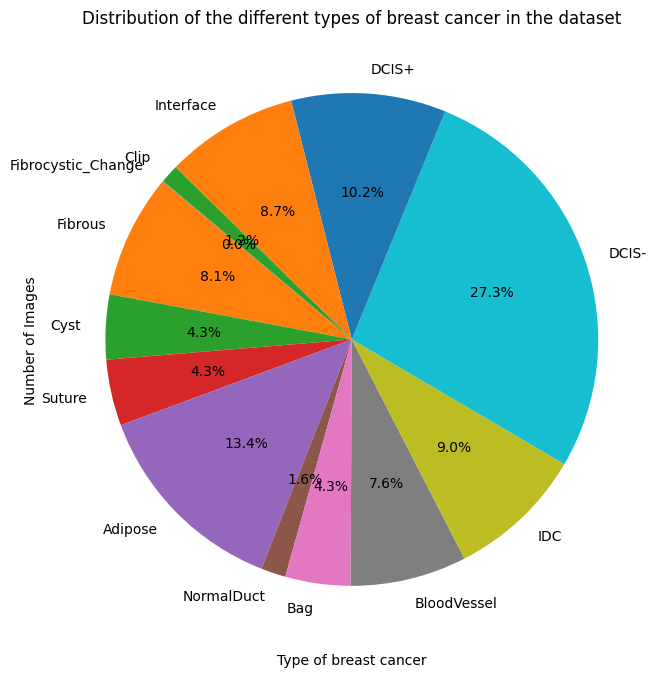

In [37]:
# Pie chart for the number of images in each subclass or type of cancer
plt.figure(figsize=(100, 8))
plt.pie(subclass_counts.values(), labels=subclass_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of the different types of breast cancer in the dataset')
plt.xlabel('Type of breast cancer')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()


In [41]:
# Function to calculate average pixel density
def calculate_avg_pixel_density(image_path):
    image = Image.open(image_path).convert('L')  # Convert image to grayscale
    return np.mean(np.array(image))

# Initialize data storage
subclass_counts = defaultdict(int)
avg_pixel_densities = defaultdict(list)
image_dimensions = []

# Function to process a single subclass
def process_subclass(subclass_path):
    subclass_name = os.path.basename(subclass_path)
    images = os.listdir(subclass_path)
    subclass_counts[subclass_name] = len(images)
    densities = []
    for image_file in images:
        image_path = os.path.join(subclass_path, image_file)
        image = Image.open(image_path).convert('L')  # Convert image to grayscale
        densities.append(calculate_avg_pixel_density(image_path))
        image_dimensions.append((subclass_name, image.size[0], image.size[1]))  # (subclass, width, height)
    return subclass_name, densities

# Traverse dataset with parallel processing
with ThreadPoolExecutor() as executor:
    futures = [executor.submit(process_subclass, os.path.join(dataset_path, subclass))
               for subclass in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, subclass))]
    
    for future in as_completed(futures):
        subclass_name, densities = future.result()
        avg_pixel_densities[subclass_name].extend(densities)

# Convert image dimensions to numpy array for easy plotting
image_dimensions = np.array(image_dimensions, dtype=object)

# Calculate overall average pixel density
overall_avg_pixel_density = np.mean([density for densities in avg_pixel_densities.values() for density in densities])

print(f"Overall average pixel density: {overall_avg_pixel_density:.2f}")

Overall average pixel density: 81.34


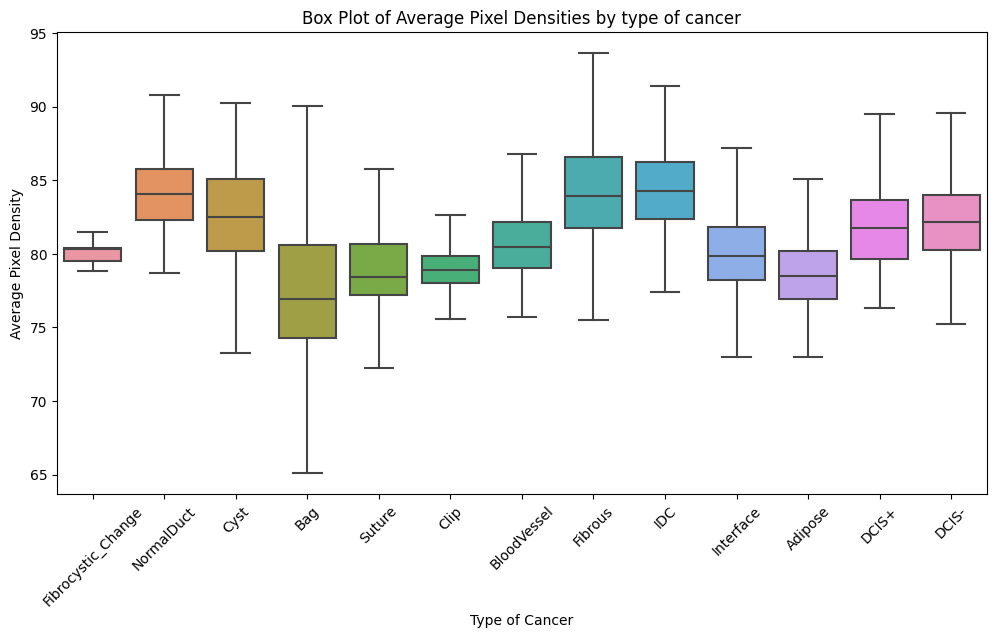

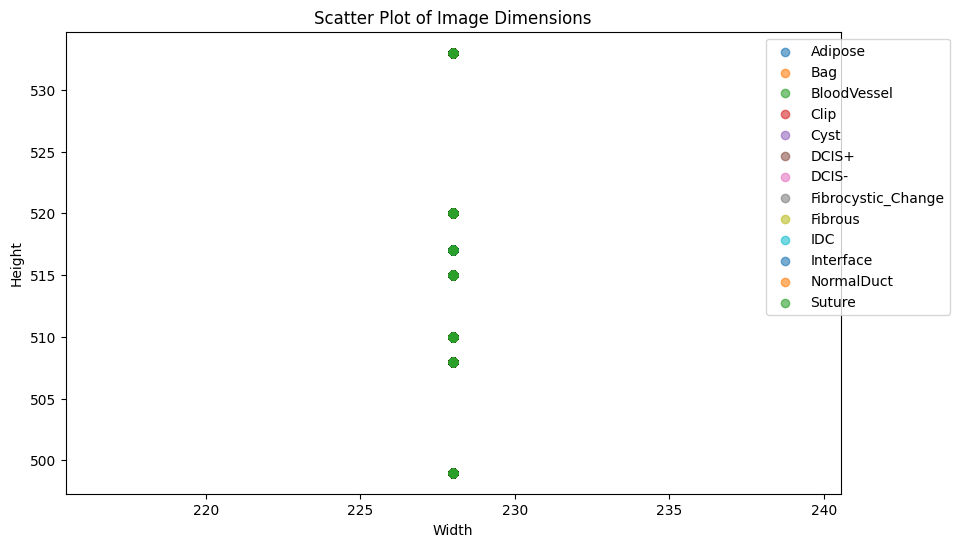

In [42]:
# Box plot for pixel densities
plt.figure(figsize=(12, 6))
sns.boxplot(data=[densities for densities in avg_pixel_densities.values()], 
            showfliers=False)
plt.title('Box Plot of Average Pixel Densities by type of cancer')
plt.xlabel('Type of Cancer')
plt.ylabel('Average Pixel Density')
plt.xticks(ticks=range(len(avg_pixel_densities)), labels=avg_pixel_densities.keys(), rotation=45)
plt.show()

# Scatter plot for image dimensions
plt.figure(figsize=(10, 6))
for subclass in np.unique(image_dimensions[:, 0]):
    dims = image_dimensions[image_dimensions[:, 0] == subclass]
    plt.scatter(dims[:, 1], dims[:, 2], label=subclass, alpha=0.6)
plt.title('Scatter Plot of Image Dimensions')
plt.xlabel('Width')
plt.ylabel('Height')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


